## Deskripsi

**Kamus Data**

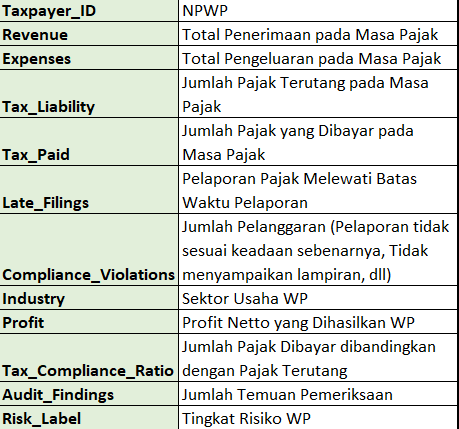 <br /><br /><br />


Anda diminta untuk melakukan data preprocessing atas kedua dataset (`task_risk_dataset - 1.xlsx` dan `task_risk_dataset - 2.xlsx`) dengan tujuan akhir membangun model prediktif yang bertujuan untuk memprediksi tingkat risiko kepatuhan WP. Lakukan seluruh tahapan data preprocessing yang dianggap perlu untuk menyiapkan data tersebut agar dapat digunakan dalam membangun model prediktif yang representatif!

## Lakukan Preprocessing Pada Section Ini

In [2]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('tax_risk-1.csv')
df2 = pd.read_csv('tax_risk-2.csv')

print(f"Dataset 1: {df1.shape[0]} baris, {df1.shape[1]} kolom")
print(f"Dataset 2: {df2.shape[0]} baris, {df2.shape[1]} kolom")


Dataset 1: 1000 baris, 12 kolom
Dataset 2: 2000 baris, 12 kolom


In [3]:
df1.head()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,Low


In [4]:
df2.head()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1001,1116301.16,1032901.72,51856.33,50904.01,1,0,Retail,83399.44,0.98,1,Low
1,1002,1313501.35,1112434.25,66091.84,148310.20,0,1,Healthcare,201067.10,2.24,1,Low
2,1003,1160255.59,578405.18,61060.86,48250.68,0,1,Tech,581850.41,0.79,7,High
3,1004,1050995.12,1486955.00,50716.96,60390.11,2,1,Healthcare,-435959.88,1.19,9,Medium
4,1005,1299575.83,2121362.30,75716.27,129943.44,3,2,Healthcare,-821786.47,1.72,0,High


In [5]:
#memahami tabel dulu
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Taxpayer_ID            1000 non-null   int64  
 1   Revenue                995 non-null    float64
 2   Expenses               1000 non-null   float64
 3   Tax_Liability          1000 non-null   float64
 4   Tax_Paid               1000 non-null   float64
 5   Late_Filings           1000 non-null   int64  
 6   Compliance_Violations  1000 non-null   int64  
 7   Industry               1000 non-null   object 
 8   Profit                 995 non-null    float64
 9   Tax_Compliance_Ratio   1000 non-null   float64
 10  Audit_Findings         1000 non-null   int64  
 11  Risk_Label             1000 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 93.9+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Taxpayer_ID            2000 non-null   int64  
 1   Revenue                1996 non-null   float64
 2   Expenses               2000 non-null   float64
 3   Tax_Liability          2000 non-null   float64
 4   Tax_Paid               2000 non-null   float64
 5   Late_Filings           2000 non-null   int64  
 6   Compliance_Violations  2000 non-null   int64  
 7   Industry               2000 non-null   object 
 8   Profit                 1996 non-null   float64
 9   Tax_Compliance_Ratio   2000 non-null   float64
 10  Audit_Findings         2000 non-null   int64  
 11  Risk_Label             2000 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 187.6+ KB


In [7]:
#cek Taxpayer_ID overlap tidak di kedua dataset
overlap = set(df1['Taxpayer_ID']).intersection(set(df2['Taxpayer_ID']))
len(overlap)

0

In [8]:
#karena ga ada yang overlap kita concat saja
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,Low


In [9]:
#cek apakah Profit = Revenue - Expenses
df['Revenue'] - df['Expenses']

0       169143.16
1        73593.97
2       482380.49
3       886296.32
4        90109.33
          ...    
2995    359585.36
2996    260210.38
2997     96672.71
2998     99872.65
2999    150200.45
Length: 3000, dtype: float64

In [10]:
df.shape

(3000, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Taxpayer_ID            3000 non-null   int64  
 1   Revenue                2991 non-null   float64
 2   Expenses               3000 non-null   float64
 3   Tax_Liability          3000 non-null   float64
 4   Tax_Paid               3000 non-null   float64
 5   Late_Filings           3000 non-null   int64  
 6   Compliance_Violations  3000 non-null   int64  
 7   Industry               3000 non-null   object 
 8   Profit                 2991 non-null   float64
 9   Tax_Compliance_Ratio   3000 non-null   float64
 10  Audit_Findings         3000 non-null   int64  
 11  Risk_Label             3000 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 281.4+ KB


In [12]:
df.describe()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Profit,Tax_Compliance_Ratio,Audit_Findings
count,3000.000000,2.991000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,2.991000e+03,3000.000000,3000.000000
mean,1500.500000,1.009746e+06,7.706636e+05,53763.225260,55440.309947,2.029000,1.045000,2.392325e+05,1.069683,4.374667
std,866.169729,3.118686e+05,4.075408e+05,28441.465316,39904.052081,1.420387,0.846885,3.981442e+05,0.573827,2.947856
min,1.000000,2.684714e+04,2.231356e+04,1097.210000,794.900000,0.000000,0.000000,-2.206596e+06,0.230000,0.000000
25%,750.750000,7.975027e+05,5.108598e+05,36048.090000,34714.095000,1.000000,0.000000,4.869703e+04,0.760000,2.000000
50%,1500.500000,1.003070e+06,6.995777e+05,49256.735000,47160.085000,2.000000,1.000000,2.639484e+05,0.970000,4.000000
75%,2250.250000,1.207228e+06,9.185109e+05,63883.832500,61849.862500,3.000000,2.000000,4.902666e+05,1.210000,7.000000
max,3000.000000,2.426725e+06,3.677660e+06,286230.800000,536650.800000,4.000000,3.000000,1.607677e+06,10.190000,9.000000


In [13]:
#pertama-tama cek duplikasi, harusnya sih ga ada karena taxpayer id ga ada yang overlap
df.duplicated().sum()

0

In [14]:
#cek missing value
df.isnull().sum()

Taxpayer_ID              0
Revenue                  9
Expenses                 0
Tax_Liability            0
Tax_Paid                 0
Late_Filings             0
Compliance_Violations    0
Industry                 0
Profit                   9
Tax_Compliance_Ratio     0
Audit_Findings           0
Risk_Label               0
dtype: int64

In [15]:
#mengatasi missing value

# Isi Revenue yang kosong dengan median Revenue -> supaya tidak rentan terhadap outlier
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].median())

In [16]:
# Hitung ulang Profit untuk baris yang tadinya null
# (Profit = Revenue - Expenses-> sudah dicek diatas tadi )
df['Profit'] = df['Revenue'] - df['Expenses']

In [17]:
#cek missing value lagi 
print(f"Missing Revenue sesudah: {df['Revenue'].isnull().sum()}")
print(f"Missing Profit sesudah: {df['Profit'].isnull().sum()}")


Missing Revenue sesudah: 0
Missing Profit sesudah: 0


In [ ]:
#mengatasi outlier
# dari deskripsi data terlihat Tax_Paid, Tax_Liability , tax compliance ratio rentangnya jauh, tapi karena Tax_Compliance_Ratio itu dihitung dari Tax_Paid / Tax_Liability, maka cukup meng-capping ratio-nya
# dari deskripsi data terlihat tax compliance ratio sebagian besar data berada di rentang 0.23–1.21 (75% data)
# dengan median sekitar 0.97. Tapi nilai max-nya 10.19

#Menggunakan metode IQR untuk mendeteksi dan capping outlier
Q1 = df['Tax_Compliance_Ratio'].quantile(0.25)
Q3 = df['Tax_Compliance_Ratio'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
# hitung ada berapa baris outlier dalam kolom Tax_Compliance_Ratio.
outliers = ((df['Tax_Compliance_Ratio'] < lower) | (df['Tax_Compliance_Ratio'] > upper)).sum()

In [19]:
print(f"IQR: {IQR:.2f}, Batas bawah: {lower:.2f}, Batas atas: {upper:.2f}")
print(f"Jumlah outlier: {outliers}")

IQR: 0.45, Batas bawah: 0.09, Batas atas: 1.88
Jumlah outlier: 142


In [20]:
df['Tax_Compliance_Ratio'].clip(lower=lower, upper=upper)

0       0.730
1       0.820
2       1.150
3       1.470
4       1.885
        ...  
2995    0.900
2996    0.560
2997    1.700
2998    1.100
2999    0.910
Name: Tax_Compliance_Ratio, Length: 3000, dtype: float64

In [21]:
# Capping: ganti outlier dengan batas atas/bawah
# Jika nilai < lower → diganti jadi lower
# Jika nilai > upper → diganti jadi upper
# Jika nilai di antara lower dan upper → tetap tidak berubah
df['Tax_Compliance_Ratio'] = df['Tax_Compliance_Ratio'].clip(lower=lower, upper=upper)
print(f"Setelah capping - Min: {df['Tax_Compliance_Ratio'].min():.2f}, Max: {df['Tax_Compliance_Ratio'].max():.2f}")


Setelah capping - Min: 0.23, Max: 1.88


In [22]:
#drop kolom yang tidak diperlukan
# Taxpayer_ID adalah identifier, bukan fitur prediktif -> drop
df = df.drop(columns='Taxpayer_ID')

In [23]:
print(f"Kolom setelah drop Taxpayer_ID: {list(df.columns)}")

Kolom setelah drop Taxpayer_ID: ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings', 'Compliance_Violations', 'Industry', 'Profit', 'Tax_Compliance_Ratio', 'Audit_Findings', 'Risk_Label']


In [24]:
# cek distribusi untuk atribut kategorikal Risk Label
df['Risk_Label'].value_counts()

Risk_Label
High      2208
Low        456
Medium     336
Name: count, dtype: int64

catatan: kelas High mendominasi. 

In [25]:
# cek distribusi untuk atribut kategorikal Industry
df['Industry'].value_counts()

Industry
Retail           699
Finance          639
Tech             564
Healthcare       564
Manufacturing    534
Name: count, dtype: int64

In [26]:
#cek hasil akhir
df.shape

(3000, 11)

In [27]:
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplikasi: {df.duplicated().sum()}")

Missing values: 0
Duplikasi: 0


# Uji Hasil Data Preparation dengan Membuat Model Prediktif Berbasis Decision Tree

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# prepare for splitting
label = {"Low":0, "Medium":1, "High":2}
features = pd.get_dummies(df, dtype=int, columns=["Industry"]).drop(columns="Risk_Label").values #encoding
target = df['Risk_Label'].apply(lambda x: label[x]).values

# splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print()

# training
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# predict
y_pred = dtc.predict(X_test)

# evaluation
print(classification_report(y_pred, y_test))

2700 300 2700 300

              precision    recall  f1-score   support

           0       0.59      0.46      0.52        52
           1       0.40      0.50      0.44        34
           2       0.88      0.89      0.88       214

    accuracy                           0.77       300
   macro avg       0.62      0.62      0.61       300
weighted avg       0.77      0.77      0.77       300

